In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
print(tf.__version__)
print(keras.__version__)
print(np.__version__)

1.10.0
2.1.6-tf
1.15.1


In [2]:
imdb = keras.datasets.imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
print("train_data original shape", train_data.shape)
print("train_labels original shape", train_labels.shape)
print("test_data original shape", test_data.shape)
print("test_labels original shape", test_labels.shape)

train_data original shape (25000,)
train_labels original shape (25000,)
test_data original shape (25000,)
test_labels original shape (25000,)


In [3]:
print(train_data[0])
print(len(train_data[0]), len(train_data[1]))

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
218 189


In [4]:
word_index = imdb.get_word_index()
word_index = {k:(v+3) for k,v in word_index.items()} 
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

In [5]:
train_data = keras.preprocessing.sequence.pad_sequences(
    train_data, 
    value=word_index["<PAD>"],
    padding='post',
    maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(
    test_data, 
    value=word_index["<PAD>"],
    padding='post',
    maxlen=256)

print("train_data original shape", train_data.shape)
print("train_data original shape", test_data.shape)

train_data original shape (25000, 256)
train_data original shape (25000, 256)


In [6]:
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [8]:
validation_data = train_data[:10000]
partial_train_data = train_data[10000:]

validation_labels = train_labels[:10000]
partial_train_lables = train_labels[10000:]

In [9]:
history = model.fit(partial_train_data,
                    partial_train_lables,
                    epochs=40,
                    batch_size=512,
                    validation_data=(validation_data, validation_labels),
                    verbose=1)

Train on 15000 samples, validate on 10000 samples
Epoch 1/40


  512/15000 [>.............................] - ETA: 7s - loss: 0.6931 - acc: 0.5137

 3584/15000 [======>.......................] - ETA: 1s - loss: 0.6937 - acc: 0.5022

 6656/15000 [============>.................] - ETA: 0s - loss: 0.6935 - acc: 0.5023

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.6932 - acc: 0.5059

12800/15000 [========================>.....] - ETA: 0s - loss: 0.6929 - acc: 0.5165

15000/15000 [==============================] - 1s 40us/step - loss: 0.6928 - acc: 0.5205 - val_loss: 0.6916 - val_acc: 0.5607


Epoch 2/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.6914 - acc: 0.5684

 3072/15000 [=====>........................] - ETA: 0s - loss: 0.6910 - acc: 0.5895

 6144/15000 [===========>..................] - ETA: 0s - loss: 0.6909 - acc: 0.5793

 8704/15000 [================>.............] - ETA: 0s - loss: 0.6908 - acc: 0.5641

11264/15000 [=====================>........] - ETA: 0s - loss: 0.6908 - acc: 0.5527

14336/15000 [===========================>..] - ETA: 0s - loss: 0.6906 - acc: 0.5571

15000/15000 [==============================] - 0s 23us/step - loss: 0.6905 - acc: 0.5587 - val_loss: 0.6895 - val_acc: 0.5882


Epoch 3/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.6879 - acc: 0.6250

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.6886 - acc: 0.5832

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.6885 - acc: 0.6016

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.6885 - acc: 0.6014

11264/15000 [=====================>........] - ETA: 0s - loss: 0.6879 - acc: 0.5961

14336/15000 [===========================>..] - ETA: 0s - loss: 0.6879 - acc: 0.5835

15000/15000 [==============================] - 0s 23us/step - loss: 0.6879 - acc: 0.5848 - val_loss: 0.6872 - val_acc: 0.6308


Epoch 4/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.6867 - acc: 0.6426

 3072/15000 [=====>........................] - ETA: 0s - loss: 0.6861 - acc: 0.6546

 6144/15000 [===========>..................] - ETA: 0s - loss: 0.6858 - acc: 0.6426

 9216/15000 [=================>............] - ETA: 0s - loss: 0.6854 - acc: 0.6219

12288/15000 [=======================>......] - ETA: 0s - loss: 0.6850 - acc: 0.6304

15000/15000 [==============================] - 0s 22us/step - loss: 0.6847 - acc: 0.6232 - val_loss: 0.6850 - val_acc: 0.5222


Epoch 5/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.6859 - acc: 0.5039

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.6834 - acc: 0.5430

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.6821 - acc: 0.5991

 8704/15000 [================>.............] - ETA: 0s - loss: 0.6814 - acc: 0.6369

11776/15000 [======================>.......] - ETA: 0s - loss: 0.6808 - acc: 0.6566

14848/15000 [============================>.] - ETA: 0s - loss: 0.6804 - acc: 0.6646

15000/15000 [==============================] - 0s 22us/step - loss: 0.6804 - acc: 0.6642 - val_loss: 0.6791 - val_acc: 0.6900


Epoch 6/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.6767 - acc: 0.7305

 3072/15000 [=====>........................] - ETA: 0s - loss: 0.6772 - acc: 0.6960

 6144/15000 [===========>..................] - ETA: 0s - loss: 0.6764 - acc: 0.6956

 9216/15000 [=================>............] - ETA: 0s - loss: 0.6757 - acc: 0.7020

12288/15000 [=======================>......] - ETA: 0s - loss: 0.6748 - acc: 0.7101

15000/15000 [==============================] - 0s 20us/step - loss: 0.6739 - acc: 0.7123 - val_loss: 0.6712 - val_acc: 0.6940


Epoch 7/40


  512/15000 [>.............................] - ETA: 0s - loss: 0.6713 - acc: 0.6875

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.6678 - acc: 0.7190

 6656/15000 [============>.................] - ETA: 0s - loss: 0.6658 - acc: 0.7260

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.6652 - acc: 0.7282

12800/15000 [========================>.....] - ETA: 0s - loss: 0.6642 - acc: 0.7275

15000/15000 [==============================] - 0s 21us/step - loss: 0.6630 - acc: 0.7319 - val_loss: 0.6596 - val_acc: 0.7328


Epoch 8/40


  512/15000 [>.............................] - ETA: 0s - loss: 0.6563 - acc: 0.7598

 3072/15000 [=====>........................] - ETA: 0s - loss: 0.6549 - acc: 0.7422

 6144/15000 [===========>..................] - ETA: 0s - loss: 0.6533 - acc: 0.7477

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.6516 - acc: 0.7446

12800/15000 [========================>.....] - ETA: 0s - loss: 0.6497 - acc: 0.7498

15000/15000 [==============================] - 0s 20us/step - loss: 0.6484 - acc: 0.7506 - val_loss: 0.6445 - val_acc: 0.7447


Epoch 9/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.6375 - acc: 0.7559

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.6360 - acc: 0.7464

 6656/15000 [============>.................] - ETA: 0s - loss: 0.6342 - acc: 0.7468

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.6332 - acc: 0.7480

12800/15000 [========================>.....] - ETA: 0s - loss: 0.6312 - acc: 0.7509

15000/15000 [==============================] - 0s 20us/step - loss: 0.6300 - acc: 0.7525 - val_loss: 0.6254 - val_acc: 0.7508


Epoch 10/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.6179 - acc: 0.7617

 3072/15000 [=====>........................] - ETA: 0s - loss: 0.6152 - acc: 0.7780

 6144/15000 [===========>..................] - ETA: 0s - loss: 0.6145 - acc: 0.7749

 9216/15000 [=================>............] - ETA: 0s - loss: 0.6117 - acc: 0.7738

12288/15000 [=======================>......] - ETA: 0s - loss: 0.6079 - acc: 0.7795

15000/15000 [==============================] - 0s 21us/step - loss: 0.6068 - acc: 0.7783 - val_loss: 0.6029 - val_acc: 0.7659


Epoch 11/40


  512/15000 [>.............................] - ETA: 0s - loss: 0.5966 - acc: 0.7754

 3072/15000 [=====>........................] - ETA: 0s - loss: 0.5940 - acc: 0.7786

 6144/15000 [===========>..................] - ETA: 0s - loss: 0.5881 - acc: 0.7865

 9216/15000 [=================>............] - ETA: 0s - loss: 0.5850 - acc: 0.7843

12288/15000 [=======================>......] - ETA: 0s - loss: 0.5831 - acc: 0.7801

15000/15000 [==============================] - 0s 21us/step - loss: 0.5807 - acc: 0.7819 - val_loss: 0.5805 - val_acc: 0.7692


Epoch 12/40


  512/15000 [>.............................] - ETA: 0s - loss: 0.5652 - acc: 0.7930

 3072/15000 [=====>........................] - ETA: 0s - loss: 0.5622 - acc: 0.8021

 6144/15000 [===========>..................] - ETA: 0s - loss: 0.5604 - acc: 0.7938

 9216/15000 [=================>............] - ETA: 0s - loss: 0.5572 - acc: 0.7950

12288/15000 [=======================>......] - ETA: 0s - loss: 0.5546 - acc: 0.7967

15000/15000 [==============================] - 0s 21us/step - loss: 0.5531 - acc: 0.7974 - val_loss: 0.5517 - val_acc: 0.7913


Epoch 13/40


  512/15000 [>.............................] - ETA: 0s - loss: 0.5386 - acc: 0.8066

 3072/15000 [=====>........................] - ETA: 0s - loss: 0.5345 - acc: 0.8161

 6144/15000 [===========>..................] - ETA: 0s - loss: 0.5315 - acc: 0.8114

 9216/15000 [=================>............] - ETA: 0s - loss: 0.5275 - acc: 0.8156

12288/15000 [=======================>......] - ETA: 0s - loss: 0.5255 - acc: 0.8157

15000/15000 [==============================] - 0s 21us/step - loss: 0.5226 - acc: 0.8183 - val_loss: 0.5256 - val_acc: 0.8048


Epoch 14/40


  512/15000 [>.............................] - ETA: 0s - loss: 0.5189 - acc: 0.8145

 3072/15000 [=====>........................] - ETA: 0s - loss: 0.5067 - acc: 0.8174

 6144/15000 [===========>..................] - ETA: 0s - loss: 0.5018 - acc: 0.8250

 9216/15000 [=================>............] - ETA: 0s - loss: 0.4973 - acc: 0.8255

12288/15000 [=======================>......] - ETA: 0s - loss: 0.4948 - acc: 0.8276

15000/15000 [==============================] - 0s 21us/step - loss: 0.4931 - acc: 0.8295 - val_loss: 0.4999 - val_acc: 0.8136


Epoch 15/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.4647 - acc: 0.8516

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.4711 - acc: 0.8424

 6656/15000 [============>.................] - ETA: 0s - loss: 0.4703 - acc: 0.8385

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.4679 - acc: 0.8381

12800/15000 [========================>.....] - ETA: 0s - loss: 0.4654 - acc: 0.8392

15000/15000 [==============================] - 0s 21us/step - loss: 0.4643 - acc: 0.8396 - val_loss: 0.4743 - val_acc: 0.8191


Epoch 16/40


  512/15000 [>.............................] - ETA: 0s - loss: 0.4670 - acc: 0.8301

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.4449 - acc: 0.8426

 6656/15000 [============>.................] - ETA: 0s - loss: 0.4426 - acc: 0.8447

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.4395 - acc: 0.8492

12800/15000 [========================>.....] - ETA: 0s - loss: 0.4388 - acc: 0.8477

15000/15000 [==============================] - 0s 21us/step - loss: 0.4374 - acc: 0.8488 - val_loss: 0.4504 - val_acc: 0.8345


Epoch 17/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.4436 - acc: 0.8359

 3072/15000 [=====>........................] - ETA: 0s - loss: 0.4278 - acc: 0.8532

 6144/15000 [===========>..................] - ETA: 0s - loss: 0.4226 - acc: 0.8569

 9216/15000 [=================>............] - ETA: 0s - loss: 0.4173 - acc: 0.8600

12288/15000 [=======================>......] - ETA: 0s - loss: 0.4144 - acc: 0.8612

15000/15000 [==============================] - 0s 21us/step - loss: 0.4112 - acc: 0.8633 - val_loss: 0.4292 - val_acc: 0.8402


Epoch 18/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.3762 - acc: 0.8867

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.3948 - acc: 0.8689

 6656/15000 [============>.................] - ETA: 0s - loss: 0.3945 - acc: 0.8696

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.3927 - acc: 0.8688

12800/15000 [========================>.....] - ETA: 0s - loss: 0.3886 - acc: 0.8703

15000/15000 [==============================] - 0s 20us/step - loss: 0.3881 - acc: 0.8706 - val_loss: 0.4100 - val_acc: 0.8468


Epoch 19/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.3739 - acc: 0.8887

 3072/15000 [=====>........................] - ETA: 0s - loss: 0.3773 - acc: 0.8773

 6144/15000 [===========>..................] - ETA: 0s - loss: 0.3728 - acc: 0.8794

 9216/15000 [=================>............] - ETA: 0s - loss: 0.3693 - acc: 0.8796

12288/15000 [=======================>......] - ETA: 0s - loss: 0.3687 - acc: 0.8775

15000/15000 [==============================] - 0s 21us/step - loss: 0.3675 - acc: 0.8773 - val_loss: 0.3937 - val_acc: 0.8517


Epoch 20/40


  512/15000 [>.............................] - ETA: 0s - loss: 0.3496 - acc: 0.8926

 3072/15000 [=====>........................] - ETA: 0s - loss: 0.3474 - acc: 0.8896

 6144/15000 [===========>..................] - ETA: 0s - loss: 0.3490 - acc: 0.8828

 9216/15000 [=================>............] - ETA: 0s - loss: 0.3499 - acc: 0.8816

12288/15000 [=======================>......] - ETA: 0s - loss: 0.3509 - acc: 0.8795

15000/15000 [==============================] - 0s 21us/step - loss: 0.3488 - acc: 0.8827 - val_loss: 0.3793 - val_acc: 0.8571


Epoch 21/40


  512/15000 [>.............................] - ETA: 0s - loss: 0.3253 - acc: 0.9004

 3072/15000 [=====>........................] - ETA: 0s - loss: 0.3376 - acc: 0.8802

 6144/15000 [===========>..................] - ETA: 0s - loss: 0.3376 - acc: 0.8838

 9216/15000 [=================>............] - ETA: 0s - loss: 0.3354 - acc: 0.8843

12288/15000 [=======================>......] - ETA: 0s - loss: 0.3347 - acc: 0.8853

15000/15000 [==============================] - 0s 21us/step - loss: 0.3324 - acc: 0.8873 - val_loss: 0.3669 - val_acc: 0.8587


Epoch 22/40


  512/15000 [>.............................] - ETA: 0s - loss: 0.3391 - acc: 0.8672

 3072/15000 [=====>........................] - ETA: 0s - loss: 0.3241 - acc: 0.8867

 6144/15000 [===========>..................] - ETA: 0s - loss: 0.3277 - acc: 0.8823

 9216/15000 [=================>............] - ETA: 0s - loss: 0.3212 - acc: 0.8896

11776/15000 [======================>.......] - ETA: 0s - loss: 0.3178 - acc: 0.8910

14848/15000 [============================>.] - ETA: 0s - loss: 0.3179 - acc: 0.8906

15000/15000 [==============================] - 0s 24us/step - loss: 0.3176 - acc: 0.8909 - val_loss: 0.3562 - val_acc: 0.8635


Epoch 23/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.3109 - acc: 0.8809

 3072/15000 [=====>........................] - ETA: 0s - loss: 0.3087 - acc: 0.8958

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.3133 - acc: 0.8883

 8704/15000 [================>.............] - ETA: 0s - loss: 0.3094 - acc: 0.8932

11776/15000 [======================>.......] - ETA: 0s - loss: 0.3077 - acc: 0.8941

14336/15000 [===========================>..] - ETA: 0s - loss: 0.3042 - acc: 0.8950

15000/15000 [==============================] - 0s 24us/step - loss: 0.3046 - acc: 0.8946 - val_loss: 0.3473 - val_acc: 0.8657


Epoch 24/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.3097 - acc: 0.8770

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.2907 - acc: 0.9000

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.2945 - acc: 0.8981

 8704/15000 [================>.............] - ETA: 0s - loss: 0.2947 - acc: 0.8975

11776/15000 [======================>.......] - ETA: 0s - loss: 0.2934 - acc: 0.8984

14848/15000 [============================>.] - ETA: 0s - loss: 0.2925 - acc: 0.8987

15000/15000 [==============================] - 0s 23us/step - loss: 0.2924 - acc: 0.8985 - val_loss: 0.3390 - val_acc: 0.8700


Epoch 25/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.2891 - acc: 0.8945

 3072/15000 [=====>........................] - ETA: 0s - loss: 0.2872 - acc: 0.8991

 6144/15000 [===========>..................] - ETA: 0s - loss: 0.2862 - acc: 0.8973

 9216/15000 [=================>............] - ETA: 0s - loss: 0.2850 - acc: 0.9000

12288/15000 [=======================>......] - ETA: 0s - loss: 0.2824 - acc: 0.9005

15000/15000 [==============================] - 0s 21us/step - loss: 0.2814 - acc: 0.9016 - val_loss: 0.3320 - val_acc: 0.8713


Epoch 26/40


  512/15000 [>.............................] - ETA: 0s - loss: 0.2703 - acc: 0.9062

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.2827 - acc: 0.8962

 6656/15000 [============>.................] - ETA: 0s - loss: 0.2771 - acc: 0.9011

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.2705 - acc: 0.9050

12800/15000 [========================>.....] - ETA: 0s - loss: 0.2711 - acc: 0.9048

15000/15000 [==============================] - 0s 21us/step - loss: 0.2713 - acc: 0.9037 - val_loss: 0.3265 - val_acc: 0.8736


Epoch 27/40


  512/15000 [>.............................] - ETA: 0s - loss: 0.2510 - acc: 0.9199

 3072/15000 [=====>........................] - ETA: 0s - loss: 0.2646 - acc: 0.9121

 6144/15000 [===========>..................] - ETA: 0s - loss: 0.2636 - acc: 0.9110

 9216/15000 [=================>............] - ETA: 0s - loss: 0.2621 - acc: 0.9113

12288/15000 [=======================>......] - ETA: 0s - loss: 0.2655 - acc: 0.9081

15000/15000 [==============================] - 0s 20us/step - loss: 0.2625 - acc: 0.9075 - val_loss: 0.3209 - val_acc: 0.8735


Epoch 28/40


  512/15000 [>.............................] - ETA: 0s - loss: 0.2396 - acc: 0.9355

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.2563 - acc: 0.9129

 6656/15000 [============>.................] - ETA: 0s - loss: 0.2536 - acc: 0.9151

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.2538 - acc: 0.9149

12800/15000 [========================>.....] - ETA: 0s - loss: 0.2559 - acc: 0.9112

15000/15000 [==============================] - 0s 20us/step - loss: 0.2534 - acc: 0.9110 - val_loss: 0.3156 - val_acc: 0.8763


Epoch 29/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.2323 - acc: 0.9199

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.2547 - acc: 0.9074

 6656/15000 [============>.................] - ETA: 0s - loss: 0.2470 - acc: 0.9123

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.2438 - acc: 0.9141

12800/15000 [========================>.....] - ETA: 0s - loss: 0.2459 - acc: 0.9130

15000/15000 [==============================] - 0s 21us/step - loss: 0.2456 - acc: 0.9137 - val_loss: 0.3121 - val_acc: 0.8775


Epoch 30/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.2481 - acc: 0.9082

 3072/15000 [=====>........................] - ETA: 0s - loss: 0.2384 - acc: 0.9160

 6144/15000 [===========>..................] - ETA: 0s - loss: 0.2334 - acc: 0.9188

 9216/15000 [=================>............] - ETA: 0s - loss: 0.2349 - acc: 0.9173

12288/15000 [=======================>......] - ETA: 0s - loss: 0.2348 - acc: 0.9177

15000/15000 [==============================] - 0s 20us/step - loss: 0.2392 - acc: 0.9144 - val_loss: 0.3080 - val_acc: 0.8784


Epoch 31/40


  512/15000 [>.............................] - ETA: 0s - loss: 0.2325 - acc: 0.9219

 3072/15000 [=====>........................] - ETA: 0s - loss: 0.2352 - acc: 0.9196

 6144/15000 [===========>..................] - ETA: 0s - loss: 0.2334 - acc: 0.9196

 9216/15000 [=================>............] - ETA: 0s - loss: 0.2323 - acc: 0.9199

12288/15000 [=======================>......] - ETA: 0s - loss: 0.2317 - acc: 0.9193

15000/15000 [==============================] - 0s 21us/step - loss: 0.2312 - acc: 0.9194 - val_loss: 0.3050 - val_acc: 0.8790


Epoch 32/40


  512/15000 [>.............................] - ETA: 0s - loss: 0.2268 - acc: 0.9258

 3072/15000 [=====>........................] - ETA: 0s - loss: 0.2367 - acc: 0.9160

 6144/15000 [===========>..................] - ETA: 0s - loss: 0.2332 - acc: 0.9162

 8704/15000 [================>.............] - ETA: 0s - loss: 0.2304 - acc: 0.9184

11776/15000 [======================>.......] - ETA: 0s - loss: 0.2281 - acc: 0.9194

14848/15000 [============================>.] - ETA: 0s - loss: 0.2249 - acc: 0.9214

15000/15000 [==============================] - 0s 22us/step - loss: 0.2252 - acc: 0.9211 - val_loss: 0.3020 - val_acc: 0.8805


Epoch 33/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.2249 - acc: 0.9082

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.2175 - acc: 0.9258

 6656/15000 [============>.................] - ETA: 0s - loss: 0.2202 - acc: 0.9238

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.2206 - acc: 0.9230

12800/15000 [========================>.....] - ETA: 0s - loss: 0.2206 - acc: 0.9227

15000/15000 [==============================] - 0s 20us/step - loss: 0.2181 - acc: 0.9237 - val_loss: 0.2996 - val_acc: 0.8815


Epoch 34/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.1944 - acc: 0.9375

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.2080 - acc: 0.9302

 6656/15000 [============>.................] - ETA: 0s - loss: 0.2120 - acc: 0.9262

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.2124 - acc: 0.9244

12800/15000 [========================>.....] - ETA: 0s - loss: 0.2115 - acc: 0.9258

15000/15000 [==============================] - 0s 21us/step - loss: 0.2122 - acc: 0.9260 - val_loss: 0.2982 - val_acc: 0.8808


Epoch 35/40


  512/15000 [>.............................] - ETA: 0s - loss: 0.2140 - acc: 0.9199

 2560/15000 [====>.........................] - ETA: 0s - loss: 0.2064 - acc: 0.9277

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.2087 - acc: 0.9270

 8704/15000 [================>.............] - ETA: 0s - loss: 0.2041 - acc: 0.9284

11776/15000 [======================>.......] - ETA: 0s - loss: 0.2057 - acc: 0.9287

14848/15000 [============================>.] - ETA: 0s - loss: 0.2076 - acc: 0.9267

15000/15000 [==============================] - 0s 22us/step - loss: 0.2071 - acc: 0.9271 - val_loss: 0.2955 - val_acc: 0.8826


Epoch 36/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.2202 - acc: 0.9219

 3072/15000 [=====>........................] - ETA: 0s - loss: 0.2062 - acc: 0.9258

 6144/15000 [===========>..................] - ETA: 0s - loss: 0.2003 - acc: 0.9297

 9216/15000 [=================>............] - ETA: 0s - loss: 0.1975 - acc: 0.9316

12288/15000 [=======================>......] - ETA: 0s - loss: 0.1993 - acc: 0.9314

15000/15000 [==============================] - 0s 21us/step - loss: 0.2011 - acc: 0.9302 - val_loss: 0.2938 - val_acc: 0.8835


Epoch 37/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.2093 - acc: 0.9141

 3072/15000 [=====>........................] - ETA: 0s - loss: 0.1963 - acc: 0.9339

 6144/15000 [===========>..................] - ETA: 0s - loss: 0.1965 - acc: 0.9307

 9216/15000 [=================>............] - ETA: 0s - loss: 0.1944 - acc: 0.9338

12288/15000 [=======================>......] - ETA: 0s - loss: 0.1947 - acc: 0.9326

15000/15000 [==============================] - 0s 21us/step - loss: 0.1961 - acc: 0.9323 - val_loss: 0.2923 - val_acc: 0.8834


Epoch 38/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.1930 - acc: 0.9199

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.1840 - acc: 0.9330

 6656/15000 [============>.................] - ETA: 0s - loss: 0.1903 - acc: 0.9328

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.1941 - acc: 0.9311

12800/15000 [========================>.....] - ETA: 0s - loss: 0.1927 - acc: 0.9328

15000/15000 [==============================] - 0s 20us/step - loss: 0.1912 - acc: 0.9339 - val_loss: 0.2917 - val_acc: 0.8832


Epoch 39/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.2043 - acc: 0.9141

 3072/15000 [=====>........................] - ETA: 0s - loss: 0.1907 - acc: 0.9323

 6144/15000 [===========>..................] - ETA: 0s - loss: 0.1893 - acc: 0.9342

 9216/15000 [=================>............] - ETA: 0s - loss: 0.1868 - acc: 0.9349

12288/15000 [=======================>......] - ETA: 0s - loss: 0.1854 - acc: 0.9371

15000/15000 [==============================] - 0s 21us/step - loss: 0.1860 - acc: 0.9367 - val_loss: 0.2899 - val_acc: 0.8845


Epoch 40/40
  512/15000 [>.............................] - ETA: 0s - loss: 0.1526 - acc: 0.9590

 3072/15000 [=====>........................] - ETA: 0s - loss: 0.1783 - acc: 0.9421

 6144/15000 [===========>..................] - ETA: 0s - loss: 0.1783 - acc: 0.9416

 9216/15000 [=================>............] - ETA: 0s - loss: 0.1798 - acc: 0.9406

12288/15000 [=======================>......] - ETA: 0s - loss: 0.1809 - acc: 0.9394

15000/15000 [==============================] - 0s 21us/step - loss: 0.1815 - acc: 0.9392 - val_loss: 0.2890 - val_acc: 0.8844


In [10]:
results = model.evaluate(test_data, test_labels)
print(results)

   32/25000 [..............................] - ETA: 2s

 1344/25000 [>.............................] - ETA: 0s

 5120/25000 [=====>........................] - ETA: 0s

 9600/25000 [==========>...................] - ETA: 0s

13728/25000 [===============>..............] - ETA: 0s

17312/25000 [===================>..........] - ETA: 0s

21344/25000 [========================>.....] - ETA: 0s

24192/25000 [============================>.] - ETA: 0s

25000/25000 [==============================] - 0s 15us/step


[0.3039062776851654, 0.87572]


In [11]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [12]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

<Figure size 640x480 with 1 Axes>

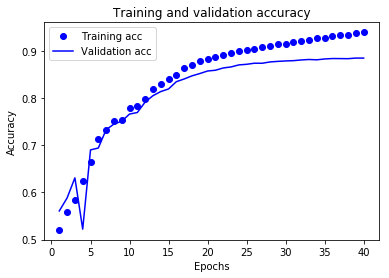

In [13]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()